In [1]:
import numpy as np
import xarray as xr
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import json

In [2]:
## Import the ecco_v4_py library into Python
## =========================================
## -- If ecco_v4_py is not installed in your local Python library,
##    tell Python where to find it. The code below adds the ECCOv4-py
##    folder under the user's home directory to the path.
from os.path import expanduser,join
import sys
user_home_dir = expanduser('~')
sys.path.append(join(user_home_dir,'ECCOv4-py'))
import ecco_v4_py as ecco

In [3]:
## Load temp/sal monthly mean files for 2010
## ================

## change ECCO_dir as needed
ECCO_dir = join(user_home_dir,'Downloads','ECCO_V4r4_PODAAC')
curr_shortname = "ECCO_L4_TEMP_SALINITY_LLC0090GRID_MONTHLY_V4R4"

curr_dir = join(ECCO_dir,curr_shortname)
import glob
files_to_load = list(glob.glob(join(curr_dir,'*2010*nc')))

# load file into workspace
theta_dataset = xr.open_mfdataset(files_to_load, parallel=True, data_vars='minimal',\
                                  coords='minimal', compat='override')

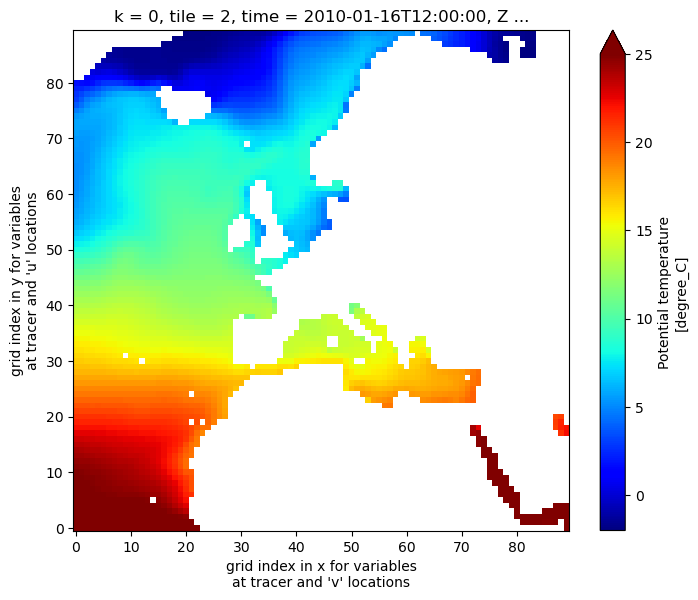

In [4]:
fig=plt.figure(figsize=(8, 6.5))
theta_dataset.THETA.isel(k=0,tile=2,time=0).plot(vmin=-2, vmax=25, cmap='jet')

In [5]:
theta_dataset.attrs = []
theta_dataset

<xarray.Dataset>
Dimensions:    (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_u: 50, k_l: 50,
                k_p1: 51, tile: 13, time: 12, nv: 2, nb: 4)
Coordinates: (12/22)
  * i          (i) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j          (j) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_u        (k_u) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    ...         ...
    Zu         (k_u) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    Zl         (k_l) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    time_bnds  (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    XC_bnds    (tile, j, i, nb) float32 dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    YC_bnds    (tile, j, i, nb) float32 dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    Z_bnds     (k, nv) float32 dask.array<chunksize=(50, 2), meta=np.ndarray>
Dimensions without coordinates: nv, nb
Data variables:
    THETA      (time, k, tile, j, i) float32 dask.array<chunksize=(1, 25, 7, 45, 45), meta=np.ndarray>
    SALT       (time, k, tile, j, i) float32 dask.array<chunksize=(1, 25, 7, 45, 45), meta=np.ndarray>

In [6]:
theta_dataset.i

<xarray.DataArray 'i' (i: 90)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
      dtype=int32)
Coordinates:
  * i        (i) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
Attributes:
    axis:                   X
    long_name:              grid index in x for variables at tracer and 'v' l...
    swap_dim:               XC
    comment:                In the Arakawa C-grid system, tracer (e.g., THETA...
    coverage_content_type:  coordinate

In [7]:
theta_dataset.j

<xarray.DataArray 'j' (j: 90)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
      dtype=int32)
Coordinates:
  * j        (j) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
Attributes:
    axis:                   Y
    long_name:              grid index in y for variables at tracer and 'u' l...
    swap_dim:               YC
    comment:                In the Arakawa C-grid system, tracer (e.g., THETA...
    coverage_content_type:  coordinate